# <a id='toc1_'></a>[PROJECT COMPANY ZUBER](#toc0_)



## <a id='toc1_1_'></a>[Introduccion](#toc0_)

Zuber, una startup de movilidad compartida que está ingresando al mercado de Chicago, requiere analizar los patrones de comportamiento y preferencias de sus usuarios potenciales, así como evaluar el impacto de factores externos en la demanda del servicio.

Para ello, se realizó una extracción estructurada de datos mediante consultas SQL optimizadas, seguida de procesos de limpieza y transformación (ETL) para garantizar la calidad de los datos. El análisis posterior permitió identificar tendencias clave y correlaciones significativas, generando insights basados en datos que respaldan la estrategia de penetración de mercado y la optimización de operaciones.

**Table of contents**<a id='toc0_'></a>    
- [PROJECT COMPANY ZUBER](#toc1_)    
  - [Introduccion](#toc1_1_)    
  - [Carga de datos](#toc1_2_)    
  - [Nombres asignados a los DataFrames](#toc1_3_)    
  - [Correcion de tipo de datos](#toc1_4_)    
  - [Principales barrios en términos de finalización](#toc1_5_)    
  - [Empresas de Taxis Vs Numero de viajes](#toc1_6_)    
  - [Conclusiones](#toc1_7_)    
- [Prueba de Hipotesis](#toc2_)    
  - [Conclusiones Hipotesis](#toc2_1_)    
- [Conclusion General del proyecto](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Carga de datos](#toc0_)

De a cuerdo a los datos extraidos para el desarrollo del proyecto, exponemos el contenido y el nombre que adoptaran los archivos csv para el desarrollo de los dataframes y los analisis posteriores a estos:

`project_sql_result_01.csv`. Contiene los siguientes datos:

   -```company_name```: nombre de la empresa de taxis.

   -`trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

`project_sql_result_04.csv`. Contiene los siguientes datos:

   -`dropoff_location_name`: barrios de Chicago donde finalizaron los viajes.

   -`average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

`project_sql_result_07.csv`. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

   -`start_ts`: fecha y hora de recogida.

   -`weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje.

   -`duration_seconds`: duración del viaje en segundos.


In [367]:
# Cargar todas las librerías
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
# project_sql_result_01.csv acogera el nombre de company_and_trips

company_and_trips=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 8/moved_project_sql_result_01.csv', sep=',')

# project_sql_result_04.csv acogera el nombre de dropoff_location_avg 

dropoff_location_avg=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 8/moved_project_sql_result_04.csv', sep=',')

# project_sql_result_07.csv acogera el nombre de start_weather

start_weather=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 8/moved_project_sql_result_07.csv', sep=',')

## <a id='toc1_3_'></a>[Nombres asignados a los DataFrames](#toc0_)

Para garantizar un desarrollo estructurado y eficiente del proyecto, se asignaron nombres descriptivos a los *DataFrames* generados a partir de las consultas SQL. Esta práctica permite mantener un flujo de trabajo organizado y facilita la interpretación de los resultados en las distintas etapas del análisis. Las asignaciones realizadas son las siguientes:

- `company_and_trips`: corresponde al resultado de la consulta `project_sql_result_01`.
- `dropoff_location_avg`: corresponde al resultado de la consulta `project_sql_result_04`.
- `start_weather`: corresponde al resultado de la consulta `project_sql_result_07`.

A continuación, se procederá con el análisis exploratorio de los datos.


In [369]:
# visualizacion preliminar de los dataframes

company_and_trips.info()
for col in company_and_trips.select_dtypes(include='object'):
    company_and_trips[col] = company_and_trips[col].str.lower()

sample_company_and_trips= company_and_trips.sample(n=5)

print()
print(sample_company_and_trips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

                        company_name  trips_amount
31  american united taxi affiliation           210
42       1085 - 72312 n and w cab co            29
5          chicago carriage cab corp          9181
15          checker taxi affiliation          2216
23             koam taxi association          1259


In [370]:
# visualizacion preliminar de los dataframes
dropoff_location_avg.info()

for col in dropoff_location_avg.select_dtypes(include='object'):
    dropoff_location_avg[col]=dropoff_location_avg[col].str.lower()
        
sample_dropoff_location_avg= dropoff_location_avg.sample(n=5)

print()
print(sample_dropoff_location_avg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

   dropoff_location_name  average_trips
44        belmont cragin      59.033333
82         south deering       7.500000
13                uptown     849.666667
59               chatham      23.200000
71           edison park      14.166667


In [371]:
# visualizacion preliminar de los dataframes
start_weather.info()
for col in start_weather.select_dtypes(include='object'):
    start_weather[col]=start_weather[col].str.lower()

sample_start_weather= start_weather.sample(n=5)

print()
print(sample_start_weather)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

                 start_ts weather_conditions  duration_seconds
435   2017-11-25 12:00:00               good            1553.0
889   2017-11-04 09:00:00               good            1680.0
1033  2017-11-11 05:00:00               good            1260.0
459   2017-11-11 10:00:00               good            1560.0
736   2017-11-04 14:00:00               good            2948.0


## <a id='toc1_4_'></a>[Correcion de tipo de datos](#toc0_)

- Dado que la naturaleza de los datos requiere un procesamiento adecuado, es fundamental contar con una estructura organizada y coherente. Por esta razón, se ha llevado a cabo una reorganización estratégica de los conjuntos de datos, lo que permitirá facilitar su análisis en cada etapa del proyecto. A continuación, se detallan las asignaciones realizadas especificamente al dataframe `start_weather`:



In [372]:
# Cambio de tipo de datos para el Analisis 

start_weather['start_ts']=pd.to_datetime(start_weather['start_ts']) 

start_weather['duration_seconds']=start_weather['duration_seconds'].astype('int')

start_weather.info()

sample_start_weather= start_weather.sample(n=5)
print()
print(sample_start_weather)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB

               start_ts weather_conditions  duration_seconds
146 2017-11-11 14:00:00               good              2340
543 2017-11-18 06:00:00               good              1500
621 2017-11-25 18:00:00               good              2345
82  2017-11-18 11:00:00               good              2843
201 2017-11-18 12:00:00                bad              2571


## <a id='toc1_5_'></a>[Principales barrios en términos de finalización](#toc0_)

Análisis de Barrios y Público Objetivo:

Tras completar la etapa de preparación de datos, el siguiente paso consiste en identificar información relevante para el estudio. En este caso particular, se buscará determinar el top 10 de barrios con mayor actividad al finalizar un recorrido. Este análisis permitirá estimar el público objetivo y, al mismo tiempo, establecer posibles tendencias o alternativas de comportamiento de los usuarios.

  dropoff_location_name  average_trips
0                  loop   10727.466667
1           river north    9523.666667
2         streeterville    6664.666667
3             west loop    5163.666667
4                o'hare    2546.900000
5             lake view    2420.966667
6            grant park    2068.533333
7         museum campus    1510.000000
8            gold coast    1364.233333
9    sheffield & depaul    1259.766667


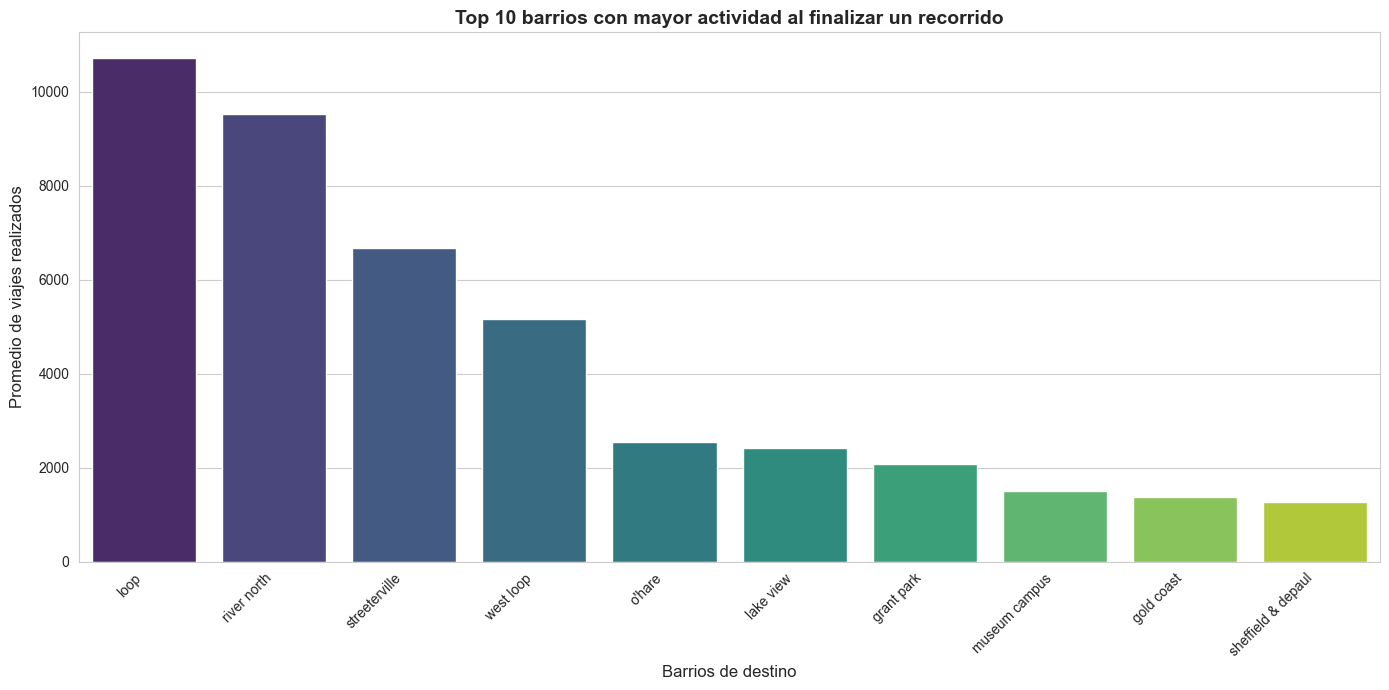

In [373]:
# Top 10 Principales barrios en terminos de finalizacion:

Top_10_dropoff_location=dropoff_location_avg.sort_values(by='average_trips',ascending=False).head(10)
print(Top_10_dropoff_location)

# Crear grafico
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))
sns.barplot(x='dropoff_location_name', y='average_trips',hue='dropoff_location_name', data=Top_10_dropoff_location, palette='viridis')
plt.xlabel('Barrios de destino', fontsize=12)
plt.ylabel('Promedio de viajes realizados', fontsize=12)
plt.title('Top 10 barrios con mayor actividad al finalizar un recorrido', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## <a id='toc1_6_'></a>[Empresas de Taxis Vs Numero de viajes](#toc0_)

Es importante destacar que la cantidad de viajes está directamente relacionada con el nivel de éxito y la confianza que los usuarios depositan en determinadas compañías de taxis. En este análisis, se resaltarán las principales empresas del sector y se examinará el comportamiento de cada una en comparación con las demás, con el objetivo de establecer conclusiones claras y fundamentadas sobre su desempeño y preferencia por parte del público.

De manera relevante seleccionaremos solo las empresas con almenos 3 cifras significativas en trayectos

                        company_name  trips_amount
0                          flash cab         19558
1          taxi affiliation services         11422
2                   medallion leasin         10367
3                         yellow cab          9888
4    taxi affiliation service yellow          9299
5          chicago carriage cab corp          9181
6                       city service          8448
7                           sun taxi          7701
8          star north management llc          7455
9  blue ribbon taxi association inc.          5953


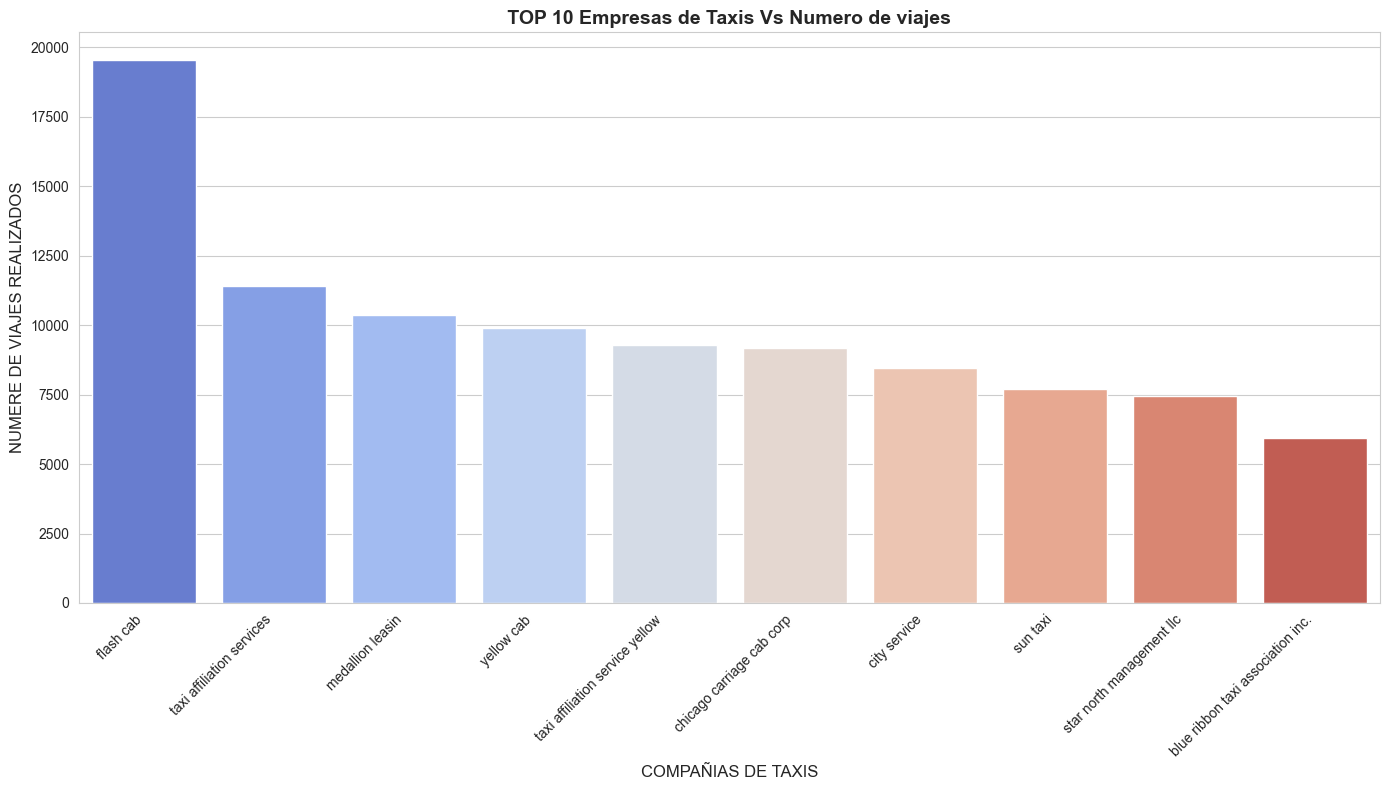

In [374]:
# Compañias de taxis frente al numero de viajes realizados:

company_and_trip =company_and_trips.sort_values(by='trips_amount',ascending=False)
company_and_trip_filtered = company_and_trip[company_and_trip['trips_amount'] > 100].head(10)
# Mostramos el resultado filtrado
print(company_and_trip_filtered)
# Crear grafico

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='company_name', y='trips_amount',hue='company_name', data=company_and_trip_filtered , palette='coolwarm')
plt.xlabel('COMPAÑIAS DE TAXIS', fontsize=12)
plt.ylabel('NUMERE DE VIAJES REALIZADOS', fontsize=12)
plt.title(' TOP 10 Empresas de Taxis Vs Numero de viajes ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## <a id='toc1_7_'></a>[Conclusiones](#toc0_)

Se identificaron las principales zonas de destino con mayor afluencia de usuarios. Áreas como el aeropuerto, los puntos turísticos y los centros comerciales presentan un flujo constante de personas, compartiendo como patrón común su naturaleza estratégica como polos de atracción dentro de la ciudad. Esta característica sugiere que el transporte representa un servicio esencial en dichos lugares, por lo que contar con una disponibilidad adecuada de vehículos influye directamente en la demanda y el comportamiento del mercado de taxis.

Al analizar las compañías que prestan servicios en estas zonas, se destaca Flash Cab como la empresa con mayor presencia y preferencia por parte de los usuarios. Su dominio podría atribuirse a su disponibilidad y visibilidad en puntos clave de la ciudad.

Sin embargo, el resto de compañías dentro del top 10 también presentan una participación significativa, lo que evidencia un entorno competitivo. Esta situación resalta la necesidad de analizar otras variables que puedan influir en la elección de los usuarios, como tarifas, tiempo de espera, calidad del servicio o promociones. Comprender estos factores será clave para establecer estrategias de posicionamiento efectivas dentro del mercado.

# <a id='toc2_'></a>[Prueba de Hipotesis](#toc0_)
A través de consultas SQL realizadas sobre las bases de datos disponibles, se extrajo información relevante correspondiente a todos los sábados del mes de noviembre. Estas consultas incluyeron tanto los datos de los viajes como las condiciones climáticas registradas en cada momento, con el objetivo de analizar posibles patrones en el comportamiento de los usuarios y la duración de los trayectos.

Para facilitar el análisis, se categorizó el clima en dos grupos: Good, que agrupa condiciones meteorológicas favorables como cielo despejado o parcialmente nublado; y Bad, que incluye situaciones adversas como lluvia, tormentas o nubosidad intensa. Esta clasificación permite evaluar cómo influye el clima en la experiencia de viaje.

Con base en esta segmentación, se procederá a realizar analisis estadisticos con el fin de llevar acabo la prueba de hipótesis estadística para determinar si existe una diferencia significativa en la duración promedio de los viajes entre días con buen y mal clima. Esto permitirá concluir si las condiciones meteorológicas tienen un impacto real en el tiempo que los usuarios tardan en completar sus trayectos.

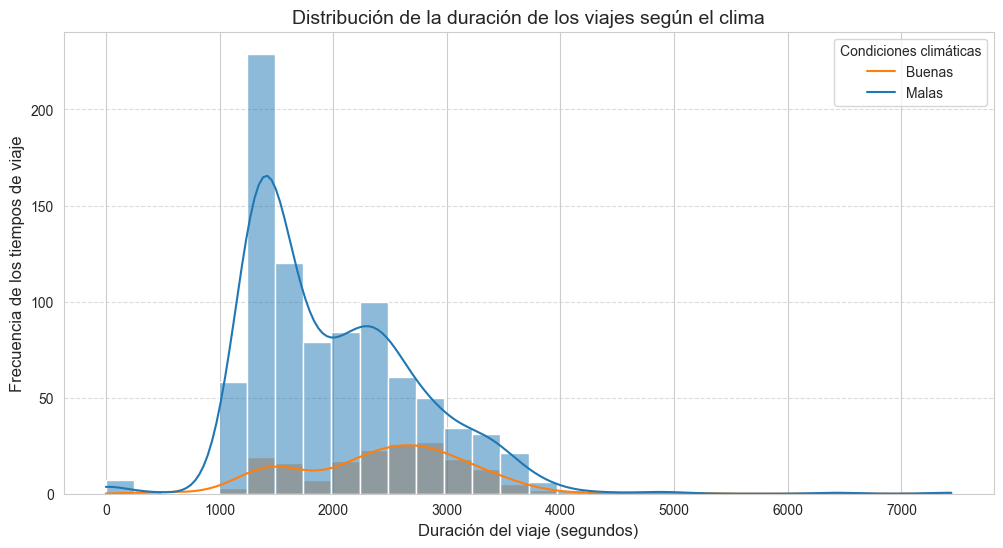

In [375]:
# Distribución del comportamiento de la duración de los viajes según las condiciones climáticas

colores = {"good": "#1f77b4", "bad": "#ff7f0e"}

# Crear la figura
plt.figure(figsize=(12, 6))
sns.histplot(data=start_weather, x='duration_seconds', hue='weather_conditions',bins=30,kde=True,alpha=0.5,palette=colores)


plt.xlabel('Duración del viaje (segundos)', fontsize=12)
plt.ylabel('Frecuencia de los tiempos de viaje', fontsize=12)
plt.title('Distribución de la duración de los viajes según el clima', fontsize=14)
plt.legend(title='Condiciones climáticas', labels=['Buenas', 'Malas'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- De forma preliminar, se observa que la duración de los viajes tiende a ser mayor cuando las condiciones climáticas son adversas, como en casos de lluvia, tormentas o nubosidad intensa. Esta distribución revela un patrón de comportamiento en los viajes directamente asociado a las condiciones del clima, lo que sugiere que los factores meteorológicos influyen significativamente en el tiempo de desplazamiento. 

In [376]:
# Calcular estadísticas de a cuerdo a las condiciones climaticas
mean_weather_conditions = start_weather.groupby('weather_conditions')['duration_seconds'].mean()
var_weather_conditions = start_weather.groupby('weather_conditions')['duration_seconds'].var()

print("Media de los duracion de lo viajes realizados deacuerdo a las condiciones climaticas :\n", mean_weather_conditions)
print("\nVarianza de los duracion de lo viajes realizados deacuerdo a las condiciones climaticas:\n", var_weather_conditions)


Media de los duracion de lo viajes realizados deacuerdo a las condiciones climaticas :
 weather_conditions
bad     2427.205556
good    1999.675676
Name: duration_seconds, dtype: float64

Varianza de los duracion de lo viajes realizados deacuerdo a las condiciones climaticas:
 weather_conditions
bad     520294.086002
good    576382.009690
Name: duration_seconds, dtype: float64


1. Promedio de duración de los viajes:

Clima adverso (bad): ~2427 segundos (~40.5 minutos)

Clima favorable (good): ~1999 segundos (~33.3 minutos)

- Esto indica que, en promedio, los viajes duran aproximadamente 7 minutos más cuando las condiciones climáticas son malas. Este aumento en la duración podría deberse a una menor visibilidad, tráfico más denso o precauciones adicionales por parte de los conductores.

2. Varianza de la duración:

Clima adverso (bad): 520,294

Clima favorable (good): 576,382

- La varianza refleja qué tan dispersos están los valores respecto a la media. En este caso, aunque los viajes con buen clima tienen una ligeramente mayor varianza, lo que sugiere una mayor diversidad en la duración de los trayectos en condiciones favorables, la diferencia no es excesiva.



In [377]:


# Separar los datos por condiciones climáticas
good_conditions = start_weather[start_weather['weather_conditions'] == 'good']['duration_seconds']
bad_conditions = start_weather[start_weather['weather_conditions'] == 'bad']['duration_seconds']

# Prueba de Levene para verificar igualdad de varianzas
levene_stat, p_value_levene = st.levene(good_conditions, bad_conditions)
equal_var = p_value_levene >= 0.05  # True si no hay diferencia significativa en varianzas

print(f"Prueba de Levene - Estadístico: {levene_stat:.4f}, p-valor: {p_value_levene:.4f}")
print(f"¿Se asumen varianzas iguales?: {'Sí' if equal_var else 'No'}")
print()

# Hipótesis
print("Hipótesis:")
print("H₀: La duración promedio de los viajes bajo condiciones climáticas buenas es igual a la de condiciones malas (μ₍good₎ = μ₍bad₎)")
print("H₁: La duración promedio de los viajes bajo condiciones climáticas buenas es diferente a la de condiciones malas (μ₍good₎ ≠ μ₍bad₎)")
print()

# Nivel de significancia
alpha = 0.05

# Prueba t para muestras independientes con varianzas iguales
results = st.ttest_ind(good_conditions, bad_conditions, equal_var=True)

# Interpretación del resultado
print(f"Valor p de la prueba t: {results.pvalue}")
if results.pvalue < alpha:
    print(" Rechazamos la hipótesis nula: hay una diferencia significativa en la duración promedio de los viajes.")
else:
    print("No podemos rechazar la hipótesis nula: no se observa una diferencia significativa en la duración promedio de los viajes.")



Prueba de Levene - Estadístico: 0.3885, p-valor: 0.5332
¿Se asumen varianzas iguales?: Sí

Hipótesis:
H₀: La duración promedio de los viajes bajo condiciones climáticas buenas es igual a la de condiciones malas (μ₍good₎ = μ₍bad₎)
H₁: La duración promedio de los viajes bajo condiciones climáticas buenas es diferente a la de condiciones malas (μ₍good₎ ≠ μ₍bad₎)

Valor p de la prueba t: 6.517970327099473e-12
 Rechazamos la hipótesis nula: hay una diferencia significativa en la duración promedio de los viajes.


## <a id='toc2_1_'></a>[Conclusiones Hipotesis](#toc0_)

Tras realizar las pruebas de hipótesis correspondientes —en este caso, para variables independientes y utilizando un nivel de significancia de α = 0.05— se pudo establecer, con base en los resultados obtenidos, que existe suficiente evidencia estadística para rechazar la hipótesis nula. Esto indica que hay una diferencia significativa en la duración de los viajes cuando las condiciones climáticas son adversas.

La elección de un valor de alfa de 0.05 se fundamenta en su amplia aceptación en estudios estadísticos de este tipo, permitiendo un equilibrio adecuado entre el riesgo de cometer errores tipo I y la rigurosidad del análisis. No se buscaba una prueba excesivamente estricta, sino una validación robusta para la toma de decisiones estratégicas.

En particular, se observó que los trayectos hacia zonas clave como el aeropuerto se ven afectados por el mal clima, lo que probablemente se deba a un incremento en la congestión vehicular y a condiciones que ralentizan el tráfico. Este hallazgo permite proponer acciones orientadas a mitigar el impacto de estas situaciones, tales como el aumento de vehículos disponibles en puntos críticos durante condiciones climáticas desfavorables, optimización de rutas y mejoras en la comunicación con los usuarios.

# <a id='toc3_'></a>[Conclusion General del proyecto](#toc0_)

A lo largo de este estudio, se analizaron múltiples aspectos relacionados con los viajes en taxi en la ciudad de Chicago. Se identificaron los barrios con mayor afluencia de usuarios, las empresas de taxis más utilizadas, y se evaluó el impacto de factores externos como el clima sobre la demanda y duración de los trayectos.

Gracias al procesamiento y análisis de datos procedentes de distintas fuentes, junto con el uso de SQL y pruebas estadísticas, se logró construir una visión integral del comportamiento de los usuarios y el desempeño del servicio. Este enfoque permitió no solo detectar zonas estratégicas para la operación de taxis, sino también recomendar medidas para mejorar la eficiencia y satisfacción del servicio.

En conjunto, los hallazgos obtenidos proporcionan una base sólida para la toma de decisiones empresariales y el diseño de estrategias operativas enfocadas en la optimización del servicio de transporte en entornos urbanos complejos y dinámicos como el de Chicago.